In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
link = 'https://drive.google.com/file/d/1ox5XXcRf2LFy-T5zP-l5uRURi1B6Wz9G/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+ link.split("/")[-2]
df_train = pd.read_csv(path)
df_train.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,difficulty,learning_stage,cheating
0,2019-05-23 11:45:00+00:00,MlJ4huAZ055iZHo2BJRhGoCRSYYDeIBv7uGFhaqNYCo=,w3a6Wk12CqIrUktZei2Z0W3Rf8xdgEdjIW9QX0MWIf8=,Q5jLvHRQpMUYKZZ6GbotWYCMvkMPq1+yCtpCzTrZW1A=,2,1,True,29,1,0,28444,7,False,0,1,easy,elementary,1
1,2019-06-10 21:15:00+00:00,2pM78+2wOAY8l2evtpJS8Q80s14QI3fjcRZb9QFBVn4=,4MP++M0mzDth2XpfseRILPjwOXOAk+Z2oAquU+nEEYE=,G4w1QQMbjRT/VptQIZkGYZhO/nkDJiC5ELv+TYfyPHM=,7,1,False,69,19,3,305999,99,False,0,1,hard,elementary,0
2,2019-06-04 16:15:00+00:00,MJPbRkeq6tFmKeTew2v3sxqobPk6QIJZRgC/dsS1Isc=,K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=,9c2hrY//vjfzCDODz8sOIragypxFG49b/t9S91Krlkg=,14,1,False,49,4,2,71162,28,False,0,0,easy,junior,0
3,2019-05-15 11:30:00+00:00,qo5D63J1RjT9YPTJsFbKo9GAamD5iF6XMdpGMPaE9g4=,Y+91ladMQTxor3mEVlnYFcmpwmJFyT1HMG+DNySbVZ4=,ZoE4lwjhMFd9OaWebsWlnK9s1AHSSpuSx8gO7gcplTA=,47,2,True,9,1,0,47540,13,False,0,0,normal,junior,1
4,2019-06-09 10:15:00+00:00,uiyyJRVzplrZoBci1aco8pUxwLFge0tPVNhpYJRoqmc=,bL9LCeyWY9s37YHGGaajw9y6AvwkTvCxHwEL9prznXk=,v4fB2VzIvLxBidz/bupuh6clyMuvR2b8BgSz6PA5UI4=,1,1,False,56,2,2,1100969,105,False,0,1,easy,elementary,1


In [ ]:
print(df_train['cheating'].value_counts())

cheating
0    5832
1    4197
Name: count, dtype: int64


In [ ]:
link1 = 'https://drive.google.com/file/d/1muldXGM0lM0hXQHXDyTQNIqjBQPUbSmZ/view?usp=sharing'
path1 = "https://drive.google.com/uc?export=download&id="+ link1.split("/")[-2]
df_test = pd.read_csv(path1)
df_test.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,difficulty,learning_stage,cheating
0,2019-06-04 16:45:00+00:00,+Oo+ob0YK/yFBooA6Nf3OW36y7Gr/b6/ba4a6UME/0A=,3yFVYhjNhMP7tnJJxuCoKfPObXOoeoA5CWP2jeb05pw=,ER8ng3Tve+gXz0rzE4j8vVQVxJQG9pViFuppcTPCiXs=,16,1,False,9,4,1,80647,29,False,0,1,normal,junior,0
1,2019-05-21 21:15:00+00:00,mswQBRjmFKewBZnx/zGLKNkgr6Qf5pxv2uge48uqKcU=,jImuGvSym6odgRoYw7vgkq4HUbmJ1tDW9fq6bo/yN5s=,EhczsL8/+nNXjaQ9riKSnb9DqC+HCnsSl3iDYW99ixQ=,5,1,True,13,1,0,239838,35,False,0,1,easy,elementary,1
2,2019-05-31 16:00:00+00:00,QOnOU/aC/jpVXnQanzAbc+E647O5X+nzhGt5VTIcF+c=,tBr8loWJrEOlzcZDaQL0Q2qMEMUVGJJiWePsXb+7O9U=,QGivcV7dEtlX9vq1WVsW9i5jjJ7IeUgUbV8xot9rfbU=,2,1,True,39,1,0,143843,15,False,0,2,normal,elementary,0
3,2019-06-11 20:30:00+00:00,J1IpAXiX5/aDRXwY49vUC1iB8B2LBN8Z5Ly4BF+p8ws=,PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,F80i4frwlUPyjWehI764RoG6nzkEcPmKb6+1HcEJXHE=,5,1,False,11,3,0,34960,1,False,0,1,easy,elementary,0
4,2019-06-05 22:45:00+00:00,gzAyQpaHDzkY9/IFCbW3JvIolRnpInuj0pJWnSbLwwg=,yHgHyIJ05U7s8Ak1XnUHY08MP++zF14JXnyie5AL5s0=,k7bHRN1JubCEXM7IVXwABfq01n/9pN30eOrL1A8z2yc=,16,2,False,21,7,4,219276,70,False,0,1,hard,elementary,0


In [ ]:
# One-hot encoding for Difficulty and Learning_stage columns
difficulty_encoded = pd.get_dummies(df_train['difficulty'], prefix='difficulty')
df_train = pd.concat([df_train, difficulty_encoded], axis=1)
df_train = df_train.drop('difficulty', axis=1)
df_train['learning_stage'] = df_train['learning_stage'].replace({'elementary': 1, 'junior': 2, 'senior': 3})

difficulty_encoded1 = pd.get_dummies(df_test['difficulty'], prefix='difficulty')
df_test = pd.concat([df_test, difficulty_encoded1], axis=1)
df_test = df_test.drop('difficulty', axis=1)
df_test['learning_stage'] = df_test['learning_stage'].replace({'elementary': 1, 'junior': 2, 'senior': 3})

/tmp/ipython-input-6-99201639.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['learning_stage'] = df_train['learning_stage'].replace({'elementary': 1, 'junior': 2, 'senior': 3})
/tmp/ipython-input-6-99201639.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['learning_stage'] = df_test['learning_stage'].replace({'elementary': 1, 'junior': 2, 'senior': 3})


In [ ]:
df_train['timestamp_TW'] = pd.to_datetime(df_train['timestamp_TW'])
df_train['hour'] = df_train['timestamp_TW'].dt.hour
df_train['minute'] = df_train['timestamp_TW'].dt.minute
df_train['weekday'] = df_train['timestamp_TW'].dt.weekday
df_train['day'] = df_train['timestamp_TW'].dt.day
df_train['month'] = df_train['timestamp_TW'].dt.month

df_test['timestamp_TW'] = pd.to_datetime(df_test['timestamp_TW'])
df_test['hour'] = df_test['timestamp_TW'].dt.hour
df_test['minute'] = df_test['timestamp_TW'].dt.minute
df_test['weekday'] = df_test['timestamp_TW'].dt.weekday
df_test['day'] = df_test['timestamp_TW'].dt.day
df_test['month'] = df_test['timestamp_TW'].dt.month

In [ ]:
df_train =df_train.drop(columns = 'timestamp_TW')
df_test =df_test.drop(columns = 'timestamp_TW')

In [ ]:
df_train = df_train.drop(columns = ['uuid', 'ucid', 'upid'])
df_test = df_test.drop(columns = ['uuid', 'ucid', 'upid'])

In [ ]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10029 entries, 0 to 10028
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   problem_number                   10029 non-null  int64
 1   exercise_problem_repeat_session  10029 non-null  int64
 2   is_correct                       10029 non-null  bool 
 3   total_sec_taken                  10029 non-null  int64
 4   total_attempt_cnt                10029 non-null  int64
 5   used_hint_cnt                    10029 non-null  int64
 6   points                           10029 non-null  int64
 7   badges_cnt                       10029 non-null  int64
 8   is_self_coach                    10029 non-null  bool 
 9   has_student_cnt                  10029 non-null  int64
 10  belongs_to_class_cnt             10029 non-null  int64
 11  learning_stage                   10029 non-null  int64
 12  cheating                         10029 non-nul

In [ ]:
X_train = df_train.drop(columns = "cheating")
y_train = df_train["cheating"]
print(X_train.shape)

X_test = df_test.drop(columns="cheating")
y_test = df_test["cheating"]
print(X_test.shape)

(10029, 20)
(2508, 20)


In [ ]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

cat_idxs = []
cat_dims = []
cat_emb_dim = []

# Trọng số xử lý mất cân bằng
class_weights = {0: 1, 1: 1.4}


# Khởi tạo mô hình TabNetClassifier với đầy đủ tham số
clf = TabNetClassifier(
    n_d=16, n_a=16,  # Kích thước decision layer & attention
    n_steps=7, gamma=1.5,  # Số bước và độ tái sử dụng feature
    n_independent=2, n_shared=2,  # Kiểm soát số lớp chung & riêng
    cat_idxs=cat_idxs, cat_emb_dim=cat_emb_dim,  # Embedding categorical
    optimizer_fn=torch.optim.Adam,  # Sử dụng Adam Optimizer
    optimizer_params=dict(lr=0.02),  # Learning rate = 0.01
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size":10, "gamma":0.9},
    mask_type="sparsemax",  # Sử dụng sparsemax cho feature selection
    lambda_sparse=1e-3,  # Điều chỉnh sparsity để chọn lọc feature
    momentum=0.02,  # BatchNorm momentum
    clip_value=2.0,  # Clipping gradient
    verbose=1,  # Hiển thị log
    device_name='auto'
)
# Convert boolean columns to integers (0 or 1)
for col in X_train.select_dtypes(include=['bool']).columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

X_train_np = X_train.values  # Chuyển thành NumPy array
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

# Huấn luyện mô hình
clf.fit(
    X_train_np, y_train_np,
    eval_set=[(X_train_np, y_train_np), (X_test_np, y_test_np)],
    eval_name=['train', 'test'],
    eval_metric=['auc', 'balanced_accuracy', 'logloss'],
    max_epochs=100, patience=60,
    batch_size=512, virtual_batch_size=128,
    num_workers=0,
    weights=class_weights,  # Trọng số cho lớp mất cân bằng
    drop_last=False
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.03089 | train_auc: 0.51785 | train_balanced_accuracy: 0.50291 | train_logloss: 1.167   | test_auc: 0.53763 | test_balanced_accuracy: 0.50049 | test_logloss: 1.1006  |  0:00:04s
epoch 1  | loss: 0.72382 | train_auc: 0.55643 | train_balanced_accuracy: 0.54672 | train_logloss: 0.90417 | test_auc: 0.57349 | test_balanced_accuracy: 0.5734  | test_logloss: 0.8906  |  0:00:06s
epoch 2  | loss: 0.68708 | train_auc: 0.52656 | train_balanced_accuracy: 0.50947 | train_logloss: 0.83037 | test_auc: 0.55081 | test_balanced_accuracy: 0.52716 | test_logloss: 0.74966 |  0:00:09s
epoch 3  | loss: 0.66846 | train_auc: 0.62516 | train_balanced_accuracy: 0.61128 | train_logloss: 0.73099 | test_auc: 0.70458 | test_balanced_accuracy: 0.68314 | test_logloss: 0.68915 |  0:00:11s
epoch 4  | loss: 0.64359 | train_auc: 0.71871 | train_balanced_accuracy: 0.63255 | train_logloss: 0.6443  | test_auc: 0.88287 | test_balanced_accuracy: 0.72119 | test_logloss: 0.57626 |  0:00:13s
epoch 5  | loss: 0.6

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


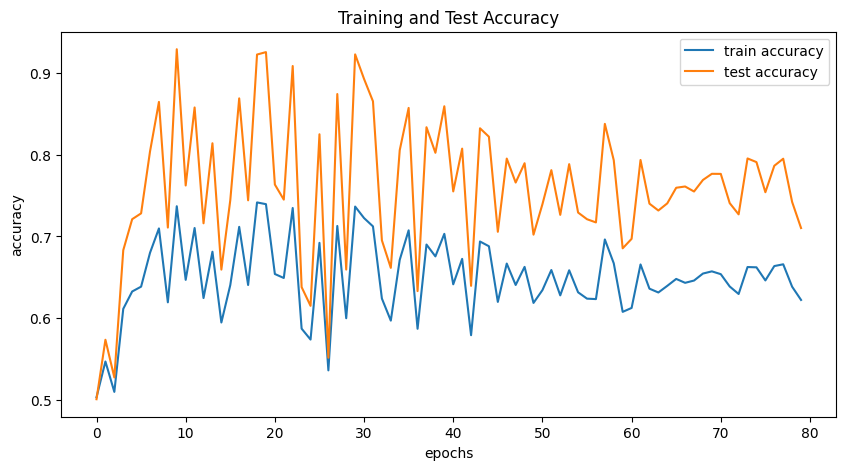

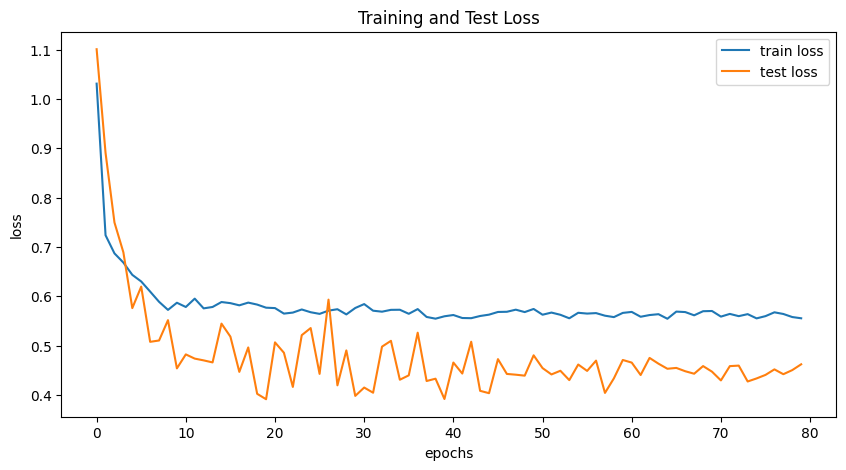

In [ ]:
import matplotlib.pyplot as plt

# Lấy lịch sử huấn luyện
history = clf.history

# Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history['train_balanced_accuracy'], label='train accuracy')
plt.plot(history['test_balanced_accuracy'], label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

# Loss
plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='train loss')
plt.plot(history['test_logloss'], label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training and Test Loss')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
probas = clf.predict_proba(X_test_np)[:, 1]
threshold = 0.5
y_pred_thresh = (probas >= threshold).astype(int)

print(classification_report(y_test.values, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1579
           1       0.92      0.90      0.91       929

    accuracy                           0.93      2508
   macro avg       0.93      0.93      0.93      2508
weighted avg       0.93      0.93      0.93      2508



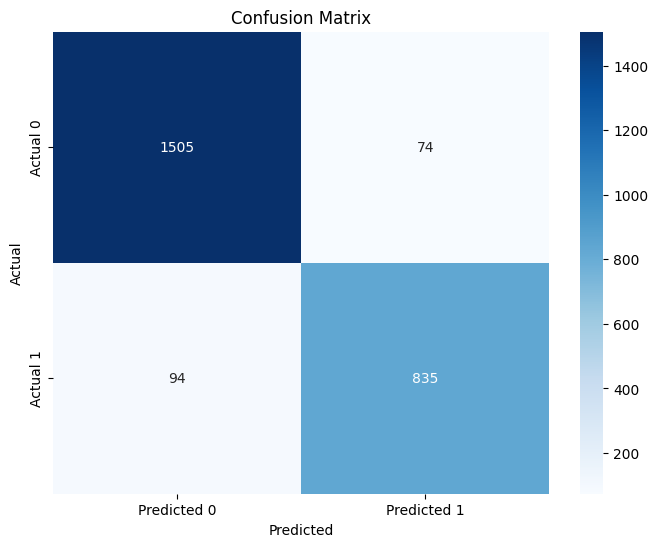

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_thresh)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


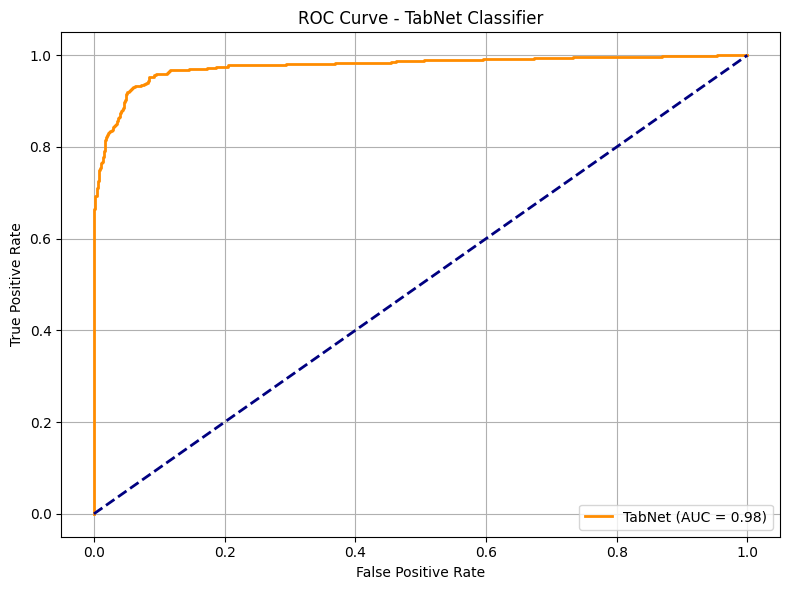

In [ ]:
from sklearn.metrics import roc_curve, auc
# Tính các giá trị cho đường ROC
fpr_tabnet, tpr_tabnet, _ = roc_curve(y_test, probas)
roc_auc_tabnet = auc(fpr_tabnet, tpr_tabnet)

# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tabnet, tpr_tabnet, color='darkorange',
         lw=2, label=f'TabNet (AUC = {roc_auc_tabnet:.2f})')

# Đường tham chiếu random guess
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Thiết lập biểu đồ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TabNet Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
